# Lecture 11

## References

* Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2nd Edition), Robert Johansson.  

## This Lecture
* Numerical integration using **scipy.integrate** submodule

## Numerical Integration

Numerical Integration is also known as quadrature.

**Derivation**:

Given $n+1$ equally spaced data points: $(x_i,f(x_i))$ for $i=0,1,2,\dots,n$, the interpolating polynomial is 
$$
p_n(x) = \sum_{i=0}^{n+1}f(x_i) l_i(x),
$$
where $l_i(x)$  is the Lagrange basis function defined by 
$$
l_i{(x)} =\prod_{k=0\\k\neq i}^{n+1}\frac{(x-x_k)}{(x_j-x_k)}.
$$

The degree $n$ polynomial is an approxmation of the function $f(x)$. 


Integrating $p_n(x)$ results the Newton-Cotes formulas:
$$
J(f) = \sum_{i=0}^{n+1}f(x_i) \int_a^b l_i(x) dx \approx  \int_a^bf(x)dx
$$

## Some commonly used Newton-Cotes formulas:

* Middle Point Rule
$$
 \int_a^bf(x)dx \approx (b-a)f\left(\frac{a+b}{2}\right)
$$

* Trapzoidal Rule
$$
 \int_a^bf(x)dx \approx \frac{b-a}{2}\left[f(a)+f(b)\right]
$$

* Simpsons Rule

$$
 \int_a^bf(x)dx \approx \frac{b-a}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]
$$






## Numerical Integration with Scipy
numerical quadrature routines in the SciPy ingegrate module can be categorized into:
* rountines that takes arrays with samples of the integrand at given data points (tabulated integrand)
* rountines that takes the integrand as a python function 

In [1]:
#import modules
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

## Tabulated Integrand
Integrand specified at predetermined points: e.g. (xdata,ydata) 

This type of situation can occur for the following situations: 
* integrand it obtained from from experiment or observations 
* if a function integrand is given, we can sample it at some predetermined points

we can use Newton-Cotes formulas (e.g., Middle point, trapzoidle  and simpsons rules). 

We had our own implementation in previous lecture. Python also has its implementation


<font color=blue>**Example**:
    evaluate
    $$
    \int_0^2\sqrt{x}dx
    $$
    by taking 25 sample points. 
    We know the exact solution is 
      $$
    \int_0^2\sqrt{x}dx = \frac{4}{3}\sqrt{2} \approx 1.885618083164127
    $$
</font>


In [2]:
val_exact=4./3.*np.sqrt(2) # set the exact value

In [3]:
f = lambda x: np.sqrt(x)

In [4]:
xdata=np.linspace(0,2, 25)
ydata=f(xdata)
xx=np.linspace(0,2, 500) # oversampled data for plot

Geometrical interpretation:

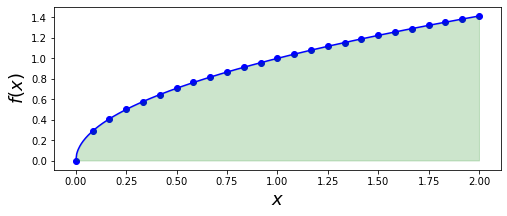

In [5]:
fig,ax=plt.subplots(figsize=(8,3))
ax.scatter(xdata,ydata,color='b')
ax.plot(xx,f(xx),'b-')
ax.fill_between(xx,f(xx),color='g',alpha=0.2)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x)$",fontsize=18)
plt.show()

Compute using trapz and simps 

In [6]:
val_trapz=integrate.trapz(ydata,xdata)
val_simps=integrate.simps(ydata,xdata)
print('val_trapz: %f\nval_simps: %f'%(val_trapz,val_simps))

val_trapz: 1.880822
val_simps: 1.883665


Compute errors

In [7]:
err_trapz=abs(val_trapz-val_exact)
err_simps=abs(val_simps-val_exact)
print('err_trapz: %f\nerr_simps: %f'%(err_trapz,err_simps))

err_trapz: 0.004796
err_simps: 0.001953


**Remark**: 
all the information we have about the integrand is the given sampled points, so we can not ask trapz or simps to compute more accurate data. 

Only way to increase accuracy is to increase the number of data points, which might be difficult if the underlying function is not known.

Let's consider the second type: 
* rountines that takes the integrand as a python function

**quad** function is an implementation of adaptive Gaussion quadrature rule. The python version of **quad** is basically wrapper for rountines from the FORTRAN library **QUADPACK**. So the speed is fast (recall compiled languages,  intepreted languages and Multilanguage Model).

<font color=blue>**Example**:
    evaluate
    $$
    \int_{-1}^1 e^{-x^2}dx
    $$
    
</font>

In [8]:
f = lambda x: np.exp(-x**2)

In [9]:
val,err=integrate.quad(f,-1,1)

In [10]:
val

1.493648265624854

In [11]:
err

1.6582826951881447e-14

**quad** function returns the estimation of value and error 

We can optionally specify the values of additional arguments

<font color=blue>**Example**:
    evaluate
    $$
    \int_{-1}^1 a e^{-(x-b)^2/c^2}dx
    $$
    
</font>


In [12]:
def f(x,a,b,c):
    return a*np.exp(-((x-b)/c)**2)

In [13]:
val,err=integrate.quad(f,-1,1,args=(1,2,3)) # we are passing a=1,b=2,c=3

In [14]:
val

1.2763068351022229

In [15]:
err

1.4169852348169507e-14

We can also use lambda function to specify args

In [16]:
g = lambda x :f(x,1,2,3)

In [17]:
val,err=integrate.quad(g,-1,1)

In [18]:
val

1.2763068351022229

In [19]:
err

1.4169852348169507e-14

The quad routine supports **infinite integration limits**

<font color=blue>**Example**:
    evaluate
    $$
    \int_{-\infty}^\infty  e^{-x^2}dx
    $$
    
</font>




In [20]:
f = lambda x: np.exp(-x**2)

In [21]:
val,err=integrate.quad(f,-np.inf,np.inf)

In [22]:
val

1.7724538509055159

In [23]:
err

1.4202636780944923e-08

With a little bit help, quad function can handle many integrals with integrable singularities

<font color=blue>**Example**:
    evaluate
    $$
    \int_{-1}^1  \frac{1}{\sqrt{|x|}}dx
    $$
    
</font>

In [24]:
f=lambda x: 1/np.sqrt(abs(x))

In [25]:
integrate.quad(f,-1,1)

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


(inf, inf)

It is useful to graph the situation to get a better understanding

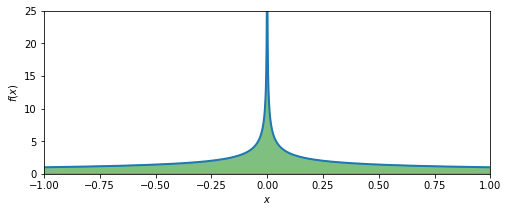

In [26]:
fig,ax=plt.subplots(figsize=(8,3))
x = np.linspace(-1,1,10000)
ax.plot(x,f(x),lw=2)  # set the linewidth to be 2
ax.fill_between(x,f(x),color='green',alpha=0.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.set_ylim(0,25)
ax.set_xlim(-1,1)

plt.show()


We can help the quad routine by specifying a list of points that should be avoided. We use the keyword **points** to do so

In [27]:
integrate.quad(f,-1,1,points=[0])

(3.9999999999999813, 5.684341886080802e-14)